Text Store

In [7]:
import csv

with open("amazon_products.csv",'r') as file:
    lines = csv.reader(file)
    
    products = []
    metadata = []
    ids = []
    image_url = []

    for i, line in enumerate(lines):
        if i==0:
            continue
        products.append(line[1])
        metadata.append({"price": line[6]})
        ids.append(line[0])
        image_url.append(line[2])

In [1]:
import chromadb
from chromadb.utils import embedding_functions
chroma_client = chromadb.PersistentClient(path="product_textdb")

In [2]:
sentence_transformer_ef = embedding_functions.SentenceTransformerEmbeddingFunction(model_name="all-mpnet-base-v2")
#collection = chroma_client.create_collection(name="Text_Store", embedding_function = sentence_     transformer_ef)

c:\Users\harma\anaconda3\envs\sklworkshop\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
collection = chroma_client.get_collection('Text_Store',embedding_function=sentence_transformer_ef)

In [4]:
collection.count()

100000

In [37]:
collection.add(
    documents = products[80000:100000],
    metadatas = metadata[80000:100000],
    ids = ids[80000:100000]
)

In [5]:
result = collection.query(
    query_texts=['Men formal shoes'],
    n_results=5,
    include = ['documents','distances','metadatas']
)

In [6]:
result

{'ids': [['B01N8UK0VC',
   'B0B5T6HLPT',
   'B09YY77Z8G',
   'B07SBTG7DD',
   'B06XC3C865']],
 'distances': [[0.34806615114212036,
   0.34806615114212036,
   0.3596971333026886,
   0.3640270233154297,
   0.3851333260536194]],
 'metadatas': [[{'price': '30.99'},
   {'price': '29.99'},
   {'price': '85.99'},
   {'price': '39.99'},
   {'price': '42.99'}]],
 'embeddings': None,
 'documents': [["Men's Dress Shoes Formal Oxfords",
   "Men's Dress Shoes Formal Oxfords",
   "Men's Dress Shoes Leather Mens Formal Shoes Black Oxford Shoes Men Lace Up Classic Shoes",
   "Men's Casual Dress Shoes",
   "Men's Dress Oxford Shoes Classic Lace Up Formal Shoes"]],
 'uris': None,
 'data': None}

In [2]:
import csv

with open("amazon_products.csv",'r') as file:
    lines = csv.reader(file)
    
    metadata = []
    ids = []
    url = []

    for i, line in enumerate(lines):
        if i==0:
            continue
        url.append("images/"+line[0]+".jpg")
        metadata.append({"price": line[6]})
        ids.append(line[0])

In [2]:
url[:5]

['images/B014TMV5YE.jpg',
 'images/B07GDLCQXV.jpg',
 'images/B07XSCCZYG.jpg',
 'images/B08MVFKGJM.jpg',
 'images/B01DJLKZBA.jpg']

In [3]:
ids[:5]

['B014TMV5YE', 'B07GDLCQXV', 'B07XSCCZYG', 'B08MVFKGJM', 'B01DJLKZBA']

In [3]:
import chromadb
from chromadb.utils import embedding_functions
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
chroma_client2 = chromadb.PersistentClient(path="product_imagedb")

In [4]:
image_loader = ImageLoader()
multimodal_ef = OpenCLIPEmbeddingFunction()
multimodal_db = chroma_client2.get_or_create_collection(name="Image_Store", embedding_function=multimodal_ef, data_loader=image_loader,
                                                        metadata={"hnsw:space": "ip"})

c:\Users\harma\anaconda3\envs\sklworkshop\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
multimodal_db.add(
    ids=ids[57000:80000], 
    uris=url[57000:80000],
    metadatas=metadata[57000:80000]
)

In [11]:
multimodal_db.count()

80000

In [10]:
from PIL import Image
from numpy import asarray
 
 
# load the image and convert into
# numpy array - hat.jpg, sunglasses.jpg, bag.jpg, cable.png
img = Image.open(r'test images/sunglasses.jpg')
 
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img)
 
# <class 'numpy.ndarray'>
print(type(numpydata))
 
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(1100, 2328, 3)


In [13]:
results = multimodal_db.query(
    query_images=numpydata,
    n_results=5,
    include=['uris','metadatas','distances']
)

In [14]:
results

{'ids': [['B071VS4VML',
   'B07Z4FQCKK',
   'B0BF9J3D3R',
   'B07JNLKL1L',
   'B094FP3SCK']],
 'distances': [[0.37680327892303467,
   0.41447150707244873,
   0.44513994455337524,
   0.4468294680118561,
   0.4703047275543213]],
 'metadatas': [[{'price': '71.62'},
   {'price': '314'},
   {'price': '25.99'},
   {'price': '7.49'},
   {'price': '15.99'}]],
 'embeddings': None,
 'documents': None,
 'uris': [['images/B071VS4VML.jpg',
   'images/B07Z4FQCKK.jpg',
   'images/B0BF9J3D3R.jpg',
   'images/B07JNLKL1L.jpg',
   'images/B094FP3SCK.jpg']],
 'data': None}

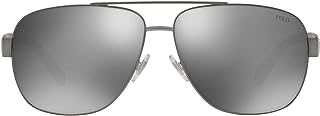

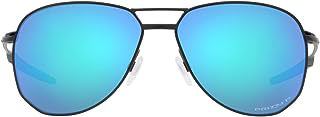

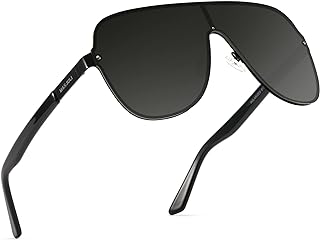

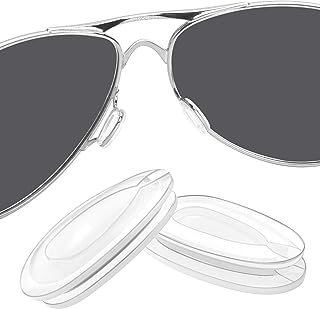

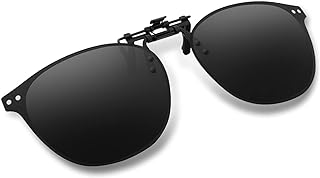

In [15]:
i = results['uris']
for j in i[0]:
    img = Image.open(j)
    display(img)

In [38]:
len(results['embeddings'][0][2])

512